.

Import libraries 

In [103]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [104]:
hotel= pd.read_csv('hotel_booking.csv')

In [105]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [106]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [107]:
hotel.shape

(119390, 36)

In [108]:
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Cleaning the data 

1- Handling missing value 

In [109]:
# Columns having missing values
hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Since the missing values in the "company" and the "agent" are high, we will delete them

In [110]:
hotel = hotel.drop(columns = ['agent', 'company'])

We will replace the null values under "children" column with mean value of children

In [111]:
hotel['children'].fillna(hotel['children'].mean(), inplace = True)

We will replace the missing value with the mode of 'country' column.

In [112]:
hotel['country'].fillna(hotel.country.mode().to_string(), inplace=True)

In [113]:
hotel.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

2-Removing duplicate rows if any

In [114]:
hotel[hotel.duplicated()].shape 

(0, 34)

There is no duplicate rows 

In [115]:
# changing datatype of column 'reservation_status_date' to data_type.
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'], format = '%Y-%m-%d')

Some questions

1-How does the Price Per Night (ADR) Vary Over the Year by Hotel Type


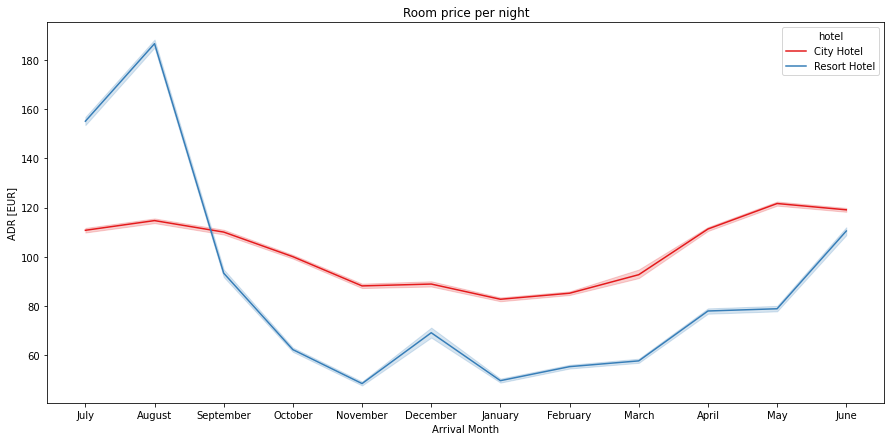

In [116]:
plt.figure(figsize=(15,7))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data= hotel,
             hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set1')

plt.title("Room price per night")
plt.xlabel("Arrival Month")
plt.ylabel("ADR [EUR]")
plt.show()

2- What is the busiest months? 

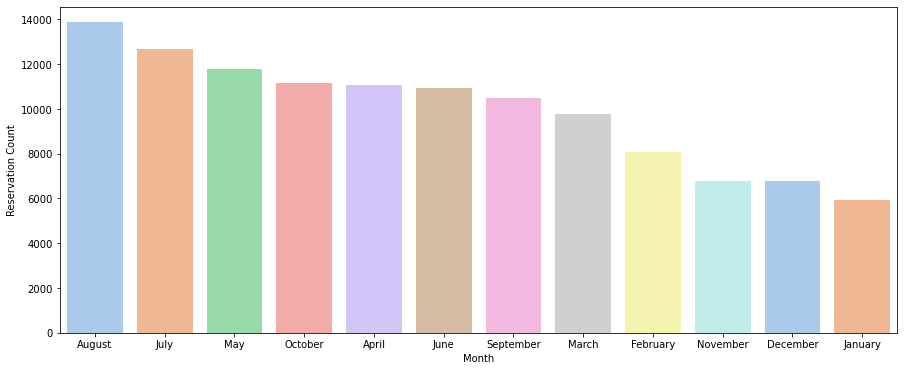

In [117]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(15,6))
sns.countplot(data=hotel ,x='arrival_date_month', palette='pastel',
              order=hotel.value_counts(hotel['arrival_date_month']).index)


plt.xlabel('Month')
plt.ylabel('Reservation Count')
plt.show()

3-

#

3- What is the top 10 Countries of Origin of the Guests ?

Text(0, 0.5, 'Reservation Count')

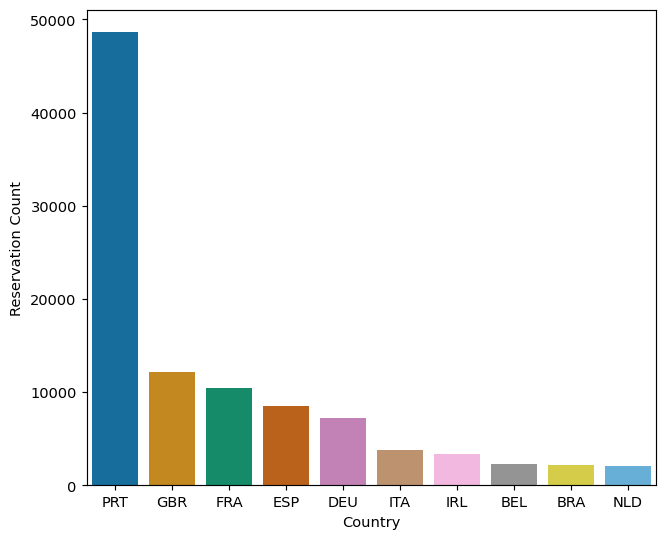

In [118]:
plt.figure(figsize=(7,6), dpi=105)

sns.countplot(data=hotel, x='country',order=pd.value_counts(hotel['country']).iloc[:10].index,
              palette='colorblind')


plt.xlabel('Country')
plt.ylabel('Reservation Count')

4-What is the ercentage of cancelled & Not cancelled bookings.

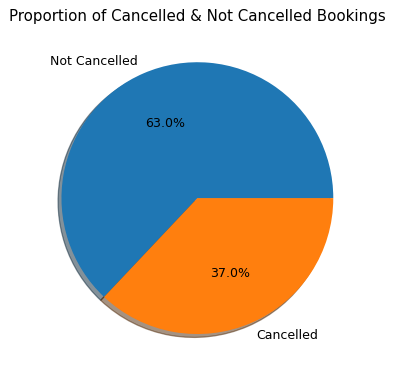

In [119]:
plt.figure(figsize=(7,5), dpi=90)
proportion = hotel['is_canceled'].value_counts()

labels = ['Not Cancelled','Cancelled']
plt.title('Proportion of Cancelled & Not Cancelled Bookings')
plt.pie(proportion, labels=labels, shadow = True, autopct = '%1.1f%%')
plt.show()

5-Who are the People with most children and baby that reserved hotel?

In [120]:
hotel['baby_children'] = hotel.apply(lambda x: x['children'] + x['babies'], axis=1)
hotel.sort_values( by= ['baby_children'], ascending= False)[['name','baby_children']][:10]

,name,baby_children
46619,Nicholas Parker,10.0
328,Jamie Ramirez,10.0
78656,Marc Robinson,9.0
40927,Brandon Quinn,3.0
119070,Pamela Castro,3.0
5189,Christine Bowman,3.0
116539,Robert Johnson,3.0
46132,Hunter Hall,3.0
61884,Alexandra Turner,3.0
118265,Carrie Yates,3.0


6-What is the number of Special Requests?

In [121]:
hotel['total_of_special_requests'].value_counts(normalize = True)

0    0.588977
1    0.278298
2    0.108627
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64

In [122]:
#

Heatmap for the correlations

<AxesSubplot:>

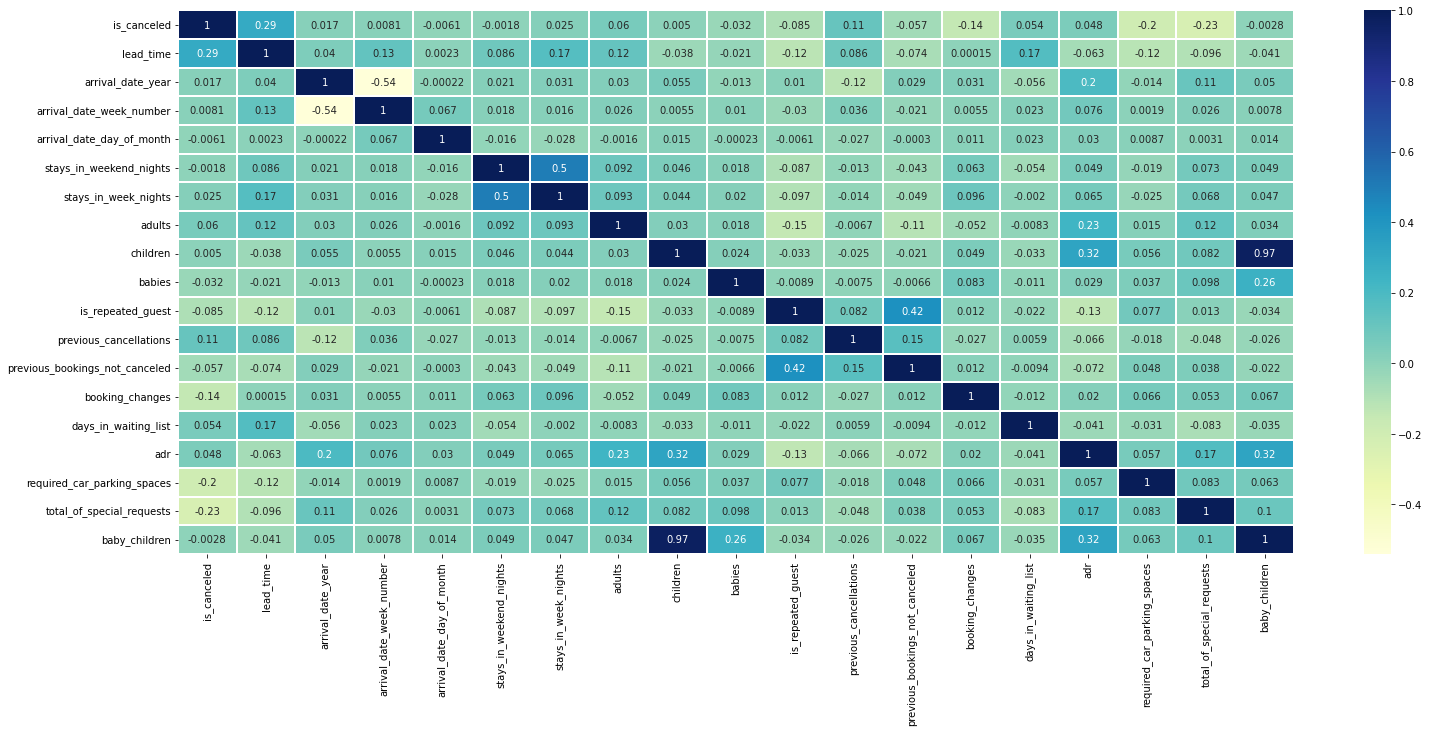

In [123]:
plt.figure(figsize=(25,10))
sns.heatmap(hotel.corr(),annot=True,linewidths=2, cmap = 'YlGnBu')

<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='adr'>

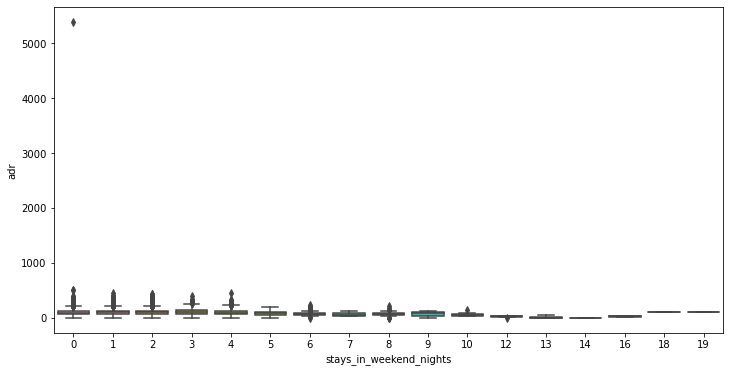

In [124]:
plt.figure(figsize = (12,6))
sns.boxplot(y = 'adr', x = 'stays_in_weekend_nights', data = hotel)

In [125]:
hotel.drop(hotel[hotel['adr'] > 5000].index, inplace = True)

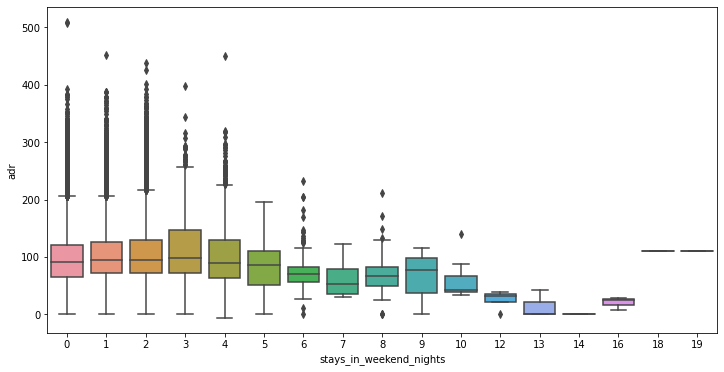

In [126]:
plt.figure(figsize = (12,6))
sns.boxplot(y = 'adr', x = 'stays_in_weekend_nights', data = hotel)
plt.show()